<a href="https://colab.research.google.com/github/verma-satyam/ML-Coding-Ninjas/blob/main/12.%20PCA%20on%20Images/4_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LOADING DATA

In [19]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import time

In [3]:
lfw = datasets.fetch_lfw_people(min_faces_per_person=100,resize=0.4)

In [4]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [5]:
lfw.data.shape,lfw.images.shape

((1140, 1850), (1140, 50, 37))

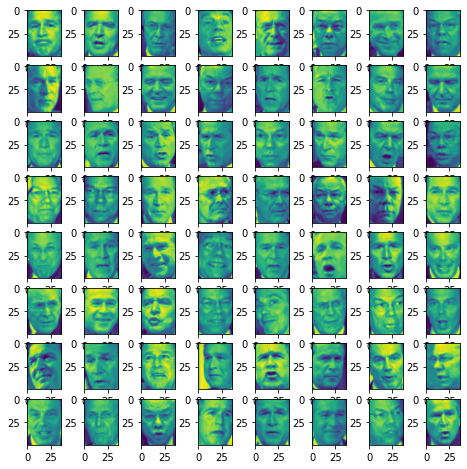

In [6]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
  ax = fig.add_subplot(8,8,i+1)
  ax.imshow(lfw.images[i])
plt.show();

In [7]:
X = lfw.data
Y = lfw.target
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0)
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
k = 0
total = pca.explained_variance_.sum()
sum = 0
while sum/total < 0.99:
  sum += pca.explained_variance_[k]
  k+=1
k

316

In [9]:
pca2 = PCA(n_components=k,whiten=True)
X_transformed = pca2.fit_transform(X_train)
X_transformed.shape

(855, 316)

In [12]:
X_approx = pca2.inverse_transform(X_transformed)
X_approx = X_approx.reshape((855,50,37))

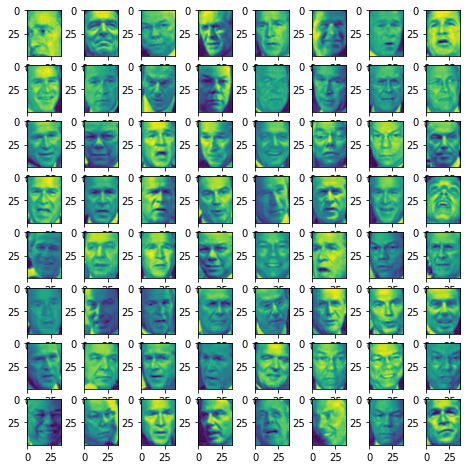

In [13]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
  ax = fig.add_subplot(8,8,i+1)
  ax.imshow(X_approx[i])
plt.show();

In [14]:
eign_vector = pca2.components_
eign_vector.shape

(316, 1850)

In [15]:
eignFaces = eign_vector.reshape((k,50,37))

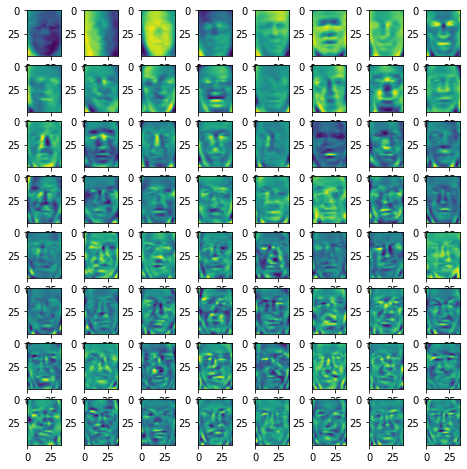

In [16]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
  ax = fig.add_subplot(8,8,i+1)
  ax.imshow(eignFaces[i])
plt.show();

In [17]:
X_train_pca = X_transformed
X_test_pca = pca2.transform(X_test)

## Classification

In [23]:
rf = RandomForestClassifier()
start = time.time()
rf.fit(X_train,Y_train)
end = time.time()
print(end-start)
Y_pred = rf.predict(X_test)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

1.9498183727264404
              precision    recall  f1-score   support

           0       0.80      0.70      0.75        61
           1       1.00      0.22      0.36        36
           2       0.58      0.98      0.73       122
           3       1.00      0.19      0.32        31
           4       0.80      0.23      0.36        35

    accuracy                           0.65       285
   macro avg       0.84      0.47      0.50       285
weighted avg       0.75      0.65      0.60       285

[[ 43   0  18   0   0]
 [  6   8  22   0   0]
 [  2   0 120   0   0]
 [  2   0  21   6   2]
 [  1   0  26   0   8]]


In [24]:
rf = RandomForestClassifier()
start = time.time()
rf.fit(X_train_pca,Y_train)
end = time.time()
print(end-start)
Y_pred = rf.predict(X_test_pca)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

1.0775461196899414
              precision    recall  f1-score   support

           0       0.63      0.20      0.30        61
           1       0.00      0.00      0.00        36
           2       0.45      0.99      0.62       122
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        35

    accuracy                           0.47       285
   macro avg       0.22      0.24      0.18       285
weighted avg       0.33      0.47      0.33       285

[[ 12   0  49   0   0]
 [  2   0  34   0   0]
 [  1   0 121   0   0]
 [  2   0  29   0   0]
 [  2   0  33   0   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
